#**PREPARACIÓN DE DATOS**
---
La etapa de preparación de datos constituye un paso fundamental dentro del proceso de minería de datos, ya que busca garantizar la calidad, consistencia y adecuación de la información antes de aplicar cualquier técnica de modelado predictivo. En esta fase se realiza la organización, limpieza y transformación del conjunto de datos con el fin de obtener una base confiable que permita extraer patrones y construir modelos precisos.


En este caso, se trabaja con el dataset “Diabetes Health Indicators Dataset”, disponible públicamente en la plataforma Kaggle (https://www.kaggle.com/datasets/mohankrishnathalla/diabetes-health-indicators-dataset). Dicho conjunto contiene indicadores de salud recopilados a partir de encuestas y registros clínicos, que permiten analizar los factores asociados al riesgo de padecer diabetes.

Durante esta sección, se llevarán a cabo las siguientes tareas:

1. Integración de los datos
2. Eliminar variables irrelevantes/redundantes
3. Descripción estadística de los datos
4. Limpieza de datos atípicos
5. Limpieza de datos nulos
6. Análisis de correlaciones para redundancias
7. Análisis de correlaciones para irrelevancias (sólo predicción)
8. Balanceo de datos (sólo clasificación)
9. Transformaciones


El resultado de este proceso será un dataset limpio, estructurado y listo para el análisis exploratorio y el modelado predictivo.

#1. Integración de los datos

En esta etapa, se carga el conjunto de datos alojado en el repositorio con el nombre de archivo ***diabetes_dataset.csv***. Previo a la visualización de los datos, es necesario importar las librearias necesarias para las etapas proximas en este proceso de preparación de datos.

In [196]:
#Importamos librerías básicas
import pandas as pd # manipulacion dataframes
import numpy as np  # matrices y vectores
import matplotlib.pyplot as plt #gráfica

In [197]:
# Se cargan los datos
data = pd.read_csv("diabetes_dataset.csv") #Cargar datos en excel
data.head() #muestras los 5 primeros registros

age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                 215         5.7  ...               41   
1                                 143         6.7  ...               55   
2                                  57         6.4  ...               66   
3                                  49         3.4  ...               50   
4                                 109         7.2  ...               52   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0              160            145              136                   236   
1               50             30               93                   150   
2               99             36              118                   195   
3               79            140              139                   253   
4              125            160              137                   184   

   insulin_level  hba1c  diabetes_risk_score  diabetes_stage  \
0           6.36   8.18                 29.6          Type 2   
1           2.00   5.63                 23.0     No Diabetes   
2           5.07   7.51                 44.7          Type 2   
3           5.28   9.03                 38.2          Type 2   
4          12.74   7.20                 23.5          Type 2   

   diagnosed_diabetes  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1  

[5 rows x 31 columns]

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

In [199]:
#Corrección del tipo de datos object a categorías
data['gender'] = data['gender'].astype('category')
data['ethnicity'] = data['ethnicity'].astype('category')
data['education_level'] = data['education_level'].astype('category')
data['income_level'] = data['income_level'].astype('category')
data['employment_status'] = data['employment_status'].astype('category')
data['smoking_status'] = data['smoking_status'].astype('category')
data['diabetes_stage'] = data['diabetes_stage'].astype('category')

# Verificar los tipos de datos después de la conversión
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 100000 non-null  int64   
 1   gender                              100000 non-null  category
 2   ethnicity                           100000 non-null  category
 3   education_level                     100000 non-null  category
 4   income_level                        100000 non-null  category
 5   employment_status                   100000 non-null  category
 6   smoking_status                      100000 non-null  category
 7   alcohol_consumption_per_week        100000 non-null  int64   
 8   physical_activity_minutes_per_week  100000 non-null  int64   
 9   diet_score                          100000 non-null  float64 
 10  sleep_hours_per_day                 100000 non-null  float64 
 11  screen_time_ho

In [200]:
data.columns

Index(['age', 'gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score',
       'diabetes_stage', 'diagnosed_diabetes'],
      dtype='object')

#2. Eliminar variables irrelevantes/redundantes

En esta tarea se identifican y eliminan las variables que no aportan información útil al análisis o al modelo predictivo, tales como datos personales (nombre, ID, cédula, teléfono, dirección, entre otros) que varían en cada registro y no influyen en el resultado. De igual forma, se descartan variables redundantes que puedan generar duplicidad o ruido en los datos.

Debido a la alta cantidad de columnas, aplicamos el uso de IA para analizar cuales son las variables irrelevantes. Esta fue la respuesta que nos arrojo la IA:

* **diabetes_risk_score:**

  Generalmente es un índice calculado a partir de otras variables (edad, IMC, presión arterial, etc.).

  Si lo dejas, el modelo podría “hacer trampa”, ya que ese score ya resume la información de las otras variables.

  ➤ Recomendado eliminarlo (es redundante).


* **diabetes_stage:**

  Suele representar el nivel de severidad o fase del diagnóstico (por ejemplo: prediabetes, diabetes tipo 2).

  Si tu variable objetivo es diagnosed_diabetes (clasificación binaria: sí/no), esta variable estaría altamente correlacionada o incluso derivada de la misma.

  ➤ Recomendado eliminarla para evitar fuga de información (“data leakage”).




In [201]:
# Eliminación de variables irrelevantes o redundantes
data = data.drop(['diabetes_risk_score', 'diabetes_stage'], axis=1)

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 100000 non-null  int64   
 1   gender                              100000 non-null  category
 2   ethnicity                           100000 non-null  category
 3   education_level                     100000 non-null  category
 4   income_level                        100000 non-null  category
 5   employment_status                   100000 non-null  category
 6   smoking_status                      100000 non-null  category
 7   alcohol_consumption_per_week        100000 non-null  int64   
 8   physical_activity_minutes_per_week  100000 non-null  int64   
 9   diet_score                          100000 non-null  float64 
 10  sleep_hours_per_day                 100000 non-null  float64 
 11  screen_time_ho

#3. Descripción estadística de los datos
En esta etapa se realiza un análisis estadístico descriptivo de las variables del dataset, con el propósito de conocer su comportamiento general, identificar rangos, medidas de tendencia central (media, mediana) y dispersión (desviación estándar), así como detectar posibles valores atípicos o distribuciones anómalas que puedan influir en el modelado posterior.

In [203]:
# Descripción breve de datos numericos
data.describe()

age  alcohol_consumption_per_week  \
count  100000.00000                 100000.000000   
mean       50.12041                      2.003670   
std        15.60460                      1.417779   
min        18.00000                      0.000000   
25%        39.00000                      1.000000   
50%        50.00000                      2.000000   
75%        61.00000                      3.000000   
max        90.00000                     10.000000   

       physical_activity_minutes_per_week     diet_score  sleep_hours_per_day  \
count                       100000.000000  100000.000000        100000.000000   
mean                           118.911640       5.994787             6.997818   
std                             84.409662       1.780954             1.094622   
min                              0.000000       0.000000             3.000000   
25%                             57.000000       4.800000             6.300000   
50%                            100.000000       6.000000             7.000000   
75%                            160.000000       7.200000             7.700000   
max                            833.000000      10.000000            10.000000   

       screen_time_hours_per_day  family_history_diabetes  \
count              100000.000000            100000.000000   
mean                    5.996468                 0.219410   
std                     2.468406                 0.413849   
min                     0.500000                 0.000000   
25%                     4.300000                 0.000000   
50%                     6.000000                 0.000000   
75%                     7.700000                 0.000000   
max                    16.800000                 1.000000   

       hypertension_history  cardiovascular_history            bmi  ...  \
count         100000.000000           100000.000000  100000.000000  ...   
mean               0.250800                0.079200      25.612653  ...   
std                0.433476                0.270052       3.586705  ...   
min                0.000000                0.000000      15.000000  ...   
25%                0.000000                0.000000      23.200000  ...   
50%                0.000000                0.000000      25.600000  ...   
75%                1.000000                0.000000      28.000000  ...   
max                1.000000                1.000000      39.200000  ...   

          heart_rate  cholesterol_total  hdl_cholesterol  ldl_cholesterol  \
count  100000.000000      100000.000000    100000.000000    100000.000000   
mean       69.632870         185.978110        54.042790       103.000430   
std         8.371954          32.013005        10.267374        33.390256   
min        40.000000         100.000000        20.000000        50.000000   
25%        64.000000         164.000000        47.000000        78.000000   
50%        70.000000         186.000000        54.000000       102.000000   
75%        75.000000         208.000000        61.000000       126.000000   
max       105.000000         318.000000        98.000000       263.000000   

       triglycerides  glucose_fasting  glucose_postprandial  insulin_level  \
count  100000.000000     100000.00000         100000.000000  100000.000000   
mean      121.462650        111.11712            160.035050       9.061242   
std        43.372619         13.59561             30.935472       4.954060   
min        30.000000         60.00000             70.000000       2.000000   
25%        91.000000        102.00000            139.000000       5.090000   
50%       121.000000        111.00000            160.000000       8.790000   
75%       151.000000        120.00000            181.000000      12.450000   
max       344.000000        172.00000            287.000000      32.220000   

               hba1c  diagnosed_diabetes  
count  100000.000000       100000.000000  
mean        6.520776            0.599980  
std         0.813921            0.489904  
min         4

In [204]:
!pip install ydata-profiling

from ydata_profiling import ProfileReport

profile_data=ProfileReport(data, minimal=True) # minimal=True
profile_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 29/29 [00:00<00:00, 65.91it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: ylabel='diagnosed_diabetes'>

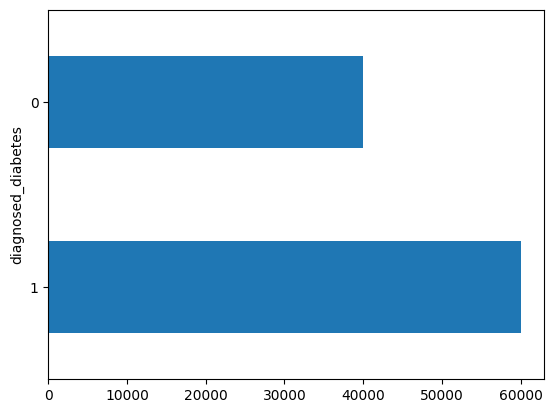

In [205]:
# Grafica de la Variable objetivo
data['diagnosed_diabetes'].value_counts().plot(kind='barh')

In [206]:
#Guardamos en html el perfilado de datos
profile_data.to_file(output_file="output_diabetes_dataset.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#4. Limpieza de datos atípicos

En esta etapa se identifican y tratan los valores atípicos o extremos que se alejan significativamente del comportamiento general de los datos, ya que pueden distorsionar los resultados estadísticos y afectar el desempeño del modelo predictivo. Se aplican técnicas para su corrección o eliminación según el caso.

Luego de analizar el rango de cada una de las variables del dataset mediante la visualización interactiva en HTML, se determinó que no existen valores fuera de los rangos esperados. En consecuencia, no se identificaron datos atípicos (outliers) que requirieran corrección o eliminación.

#5. Limpieza de datos nulos: Imputación
En esta etapa se aplican estrategias para el tratamiento de valores faltantes, con el fin de evitar sesgos o pérdida de información en el análisis. Se eliminan registros o variables con más del 15 % de datos nulos y, en los casos restantes, se imputan los valores faltantes utilizando medidas estadísticas (media, mediana o moda) o métodos de predicción basados en minería de datos.

In [207]:
#Observar la cantidad de registros y determinar si hay datos nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 100000 non-null  int64   
 1   gender                              100000 non-null  category
 2   ethnicity                           100000 non-null  category
 3   education_level                     100000 non-null  category
 4   income_level                        100000 non-null  category
 5   employment_status                   100000 non-null  category
 6   smoking_status                      100000 non-null  category
 7   alcohol_consumption_per_week        100000 non-null  int64   
 8   physical_activity_minutes_per_week  100000 non-null  int64   
 9   diet_score                          100000 non-null  float64 
 10  sleep_hours_per_day                 100000 non-null  float64 
 11  screen_time_ho

De acuerdo a la información anterior, se determina que **no hay datos nulos**

Sin embargo, de acuerdo al formato html generado anteriormente, es necesario modificar algunas variables que son numéricas, pero que de acuerdo a su variedad de valores y rango, debería ser categóricas.

In [208]:
#Corrección del tipo de datos object a categorías
data['alcohol_consumption_per_week'] = data['alcohol_consumption_per_week'].astype('category')
data['family_history_diabetes'] = data['family_history_diabetes'].astype('category')
data['hypertension_history'] = data['hypertension_history'].astype('category')
data['cardiovascular_history'] = data['cardiovascular_history'].astype('category')
data['diagnosed_diabetes'] = data['diagnosed_diabetes'].astype('category')

# Verificar los tipos de datos después de la conversión
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 100000 non-null  int64   
 1   gender                              100000 non-null  category
 2   ethnicity                           100000 non-null  category
 3   education_level                     100000 non-null  category
 4   income_level                        100000 non-null  category
 5   employment_status                   100000 non-null  category
 6   smoking_status                      100000 non-null  category
 7   alcohol_consumption_per_week        100000 non-null  category
 8   physical_activity_minutes_per_week  100000 non-null  int64   
 9   diet_score                          100000 non-null  float64 
 10  sleep_hours_per_day                 100000 non-null  float64 
 11  screen_time_ho

# 6. Análisis de correlaciones para redundancias
En esta etapa se analiza el grado de correlación entre las variables con el fin de detectar aquellas que presentan una alta dependencia (correlación mayor a 0.8). Las variables altamente correlacionadas se eliminan para evitar redundancia y multicolinealidad, mejorando así la eficiencia y estabilidad del modelo predictivo.

Para esta tarea, es necesario normalizar aquellas variables categoricas, es decir, crearles Dummies.

In [209]:
# Todas las variables deben ser numéricas para calcular las correlaciones
# Se crean dummies para las variables categóricas

data_num = pd.get_dummies(data, columns=['gender', 'ethnicity', 'education_level', 'income_level','employment_status', 'smoking_status',
                                         'alcohol_consumption_per_week'], drop_first=False, dtype=int)
data_num = pd.get_dummies(data_num, columns=['family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'diagnosed_diabetes'], drop_first=True, dtype=int)
data_num.head()

age  physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0   58                                 215         5.7                  7.9   
1   48                                 143         6.7                  6.5   
2   60                                  57         6.4                 10.0   
3   74                                  49         3.4                  6.6   
4   46                                 109         7.2                  7.4   

   screen_time_hours_per_day   bmi  waist_to_hip_ratio  systolic_bp  \
0                        7.9  30.5                0.89          134   
1                        8.7  23.1                0.80          129   
2                        8.1  22.2                0.81          115   
3                        5.2  26.8                0.88          120   
4                        5.0  21.2                0.78           92   

   diastolic_bp  heart_rate  ...  alcohol_consumption_per_week_5  \
0            78          68  ...                               0   
1            76          67  ...                               0   
2            73          74  ...                               0   
3            93          68  ...                               0   
4            67          67  ...                               0   

   alcohol_consumption_per_week_6  alcohol_consumption_per_week_7  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   alcohol_consumption_per_week_8  alcohol_consumption_per_week_9  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   alcohol_consumption_per_week_10  family_history_diabetes_1  \
0                                0                          0   
1                                0                          0   
2                                0                          1   
3                                0                          0   
4                                0                          0   

   hypertension_history_1  cardiovascular_history_1  diagnosed_diabetes_1  
0                       0                         0                     1  
1                       0                         0                     0  
2                       0                         0                     1  
3                       0                         0                     1  
4                       0                         0                     1  

[5 rows x 57 columns]

In [210]:
#Correlaciones: variables numéricas
correlaciones = data_num.corr()
correlaciones

age  \
age                                 1.000000   
physical_activity_minutes_per_week  0.003352   
diet_score                         -0.003326   
sleep_hours_per_day                -0.002802   
screen_time_hours_per_day          -0.004704   
bmi                                 0.092643   
waist_to_hip_ratio                  0.069654   
systolic_bp                         0.547696   
diastolic_bp                        0.196996   
heart_rate                         -0.000597   
cholesterol_total                   0.309717   
hdl_cholesterol                    -0.016358   
ldl_cholesterol                     0.281275   
triglycerides                       0.039449   
glucose_fasting                     0.231533   
glucose_postprandial                0.132479   
insulin_level                       0.045412   
hba1c                               0.159447   
gender_Female                      -0.002397   
gender_Male                         0.003345   
gender_Other                       -0.003360   
ethnicity_Asian                    -0.006761   
ethnicity_Black                     0.004083   
ethnicity_Hispanic                  0.000472   
ethnicity_Other                     0.001449   
ethnicity_White                     0.000224   
education_level_Graduate            0.001139   
education_level_Highschool         -0.000053   
education_level_No formal          -0.000915   
education_level_Postgraduate       -0.000885   
income_level_High                   0.000878   
income_level_Low                    0.003351   
income_level_Lower-Middle           0.000986   
income_level_Middle                -0.000884   
income_level_Upper-Middle          -0.003479   
employment_status_Employed         -0.002119   
employment_status_Retired          -0.001265   
employment_status_Student           0.000152   
employment_status_Unemployed        0.004699   
smoking_status_Current              0.001127   
smoking_status_Former               0.001856   
smoking_status_Never               -0.002437   
alcohol_consumption_per_week_0      0.001848   
alcohol_consumption_per_week_1     -0.002853   
alcohol_consumption_per_week_2     -0.001397   
alcohol_consumption_per_week_3      0.001033   
alcohol_consumption_per_week_4      0.003079   
alcohol_consumption_per_week_5      0.001124   
alcohol_consumption_per_week_6      0.000406   
alcohol_consumption_per_week_7     -0.002839   
alcohol_consumption_per_week_8     -0.003140   
alcohol_consumption_per_week_9      0.000755   
alcohol_consumption_per_week_10    -0.006483   
family_history_diabetes_1          -0.002877   
hypertension_history_1              0.177706   
cardiovascular_history_1            0.146797   
diagnosed_diabetes_1                0.137713   

                                    physical_activity_minutes_per_week  \
age                                                           0.003352   
physical_activity_minutes_per_week                            1.000000   
diet_score                                                   -0.002470   
sleep_hours_per_day                                          -0.004735   
screen_time_hours_per_day                                     0.000996   
bmi                                                          -0.071907   
waist_to_hip_ratio                                           -0.053932   
systolic_bp                                                  -0.008599   
diastolic_bp                                                 -0.008632   
heart_rate                                                   -0.253275   
cholesterol_total                                            -0.009555   
hdl_cholesterol                                               0.018044   
ldl_cholesterol                                              -0.014119   
triglycerides                                                -0.026527   
glucose_fasting                                              -0.161946   
glucose_postprandial                                         -0.093936  

<Axes: >

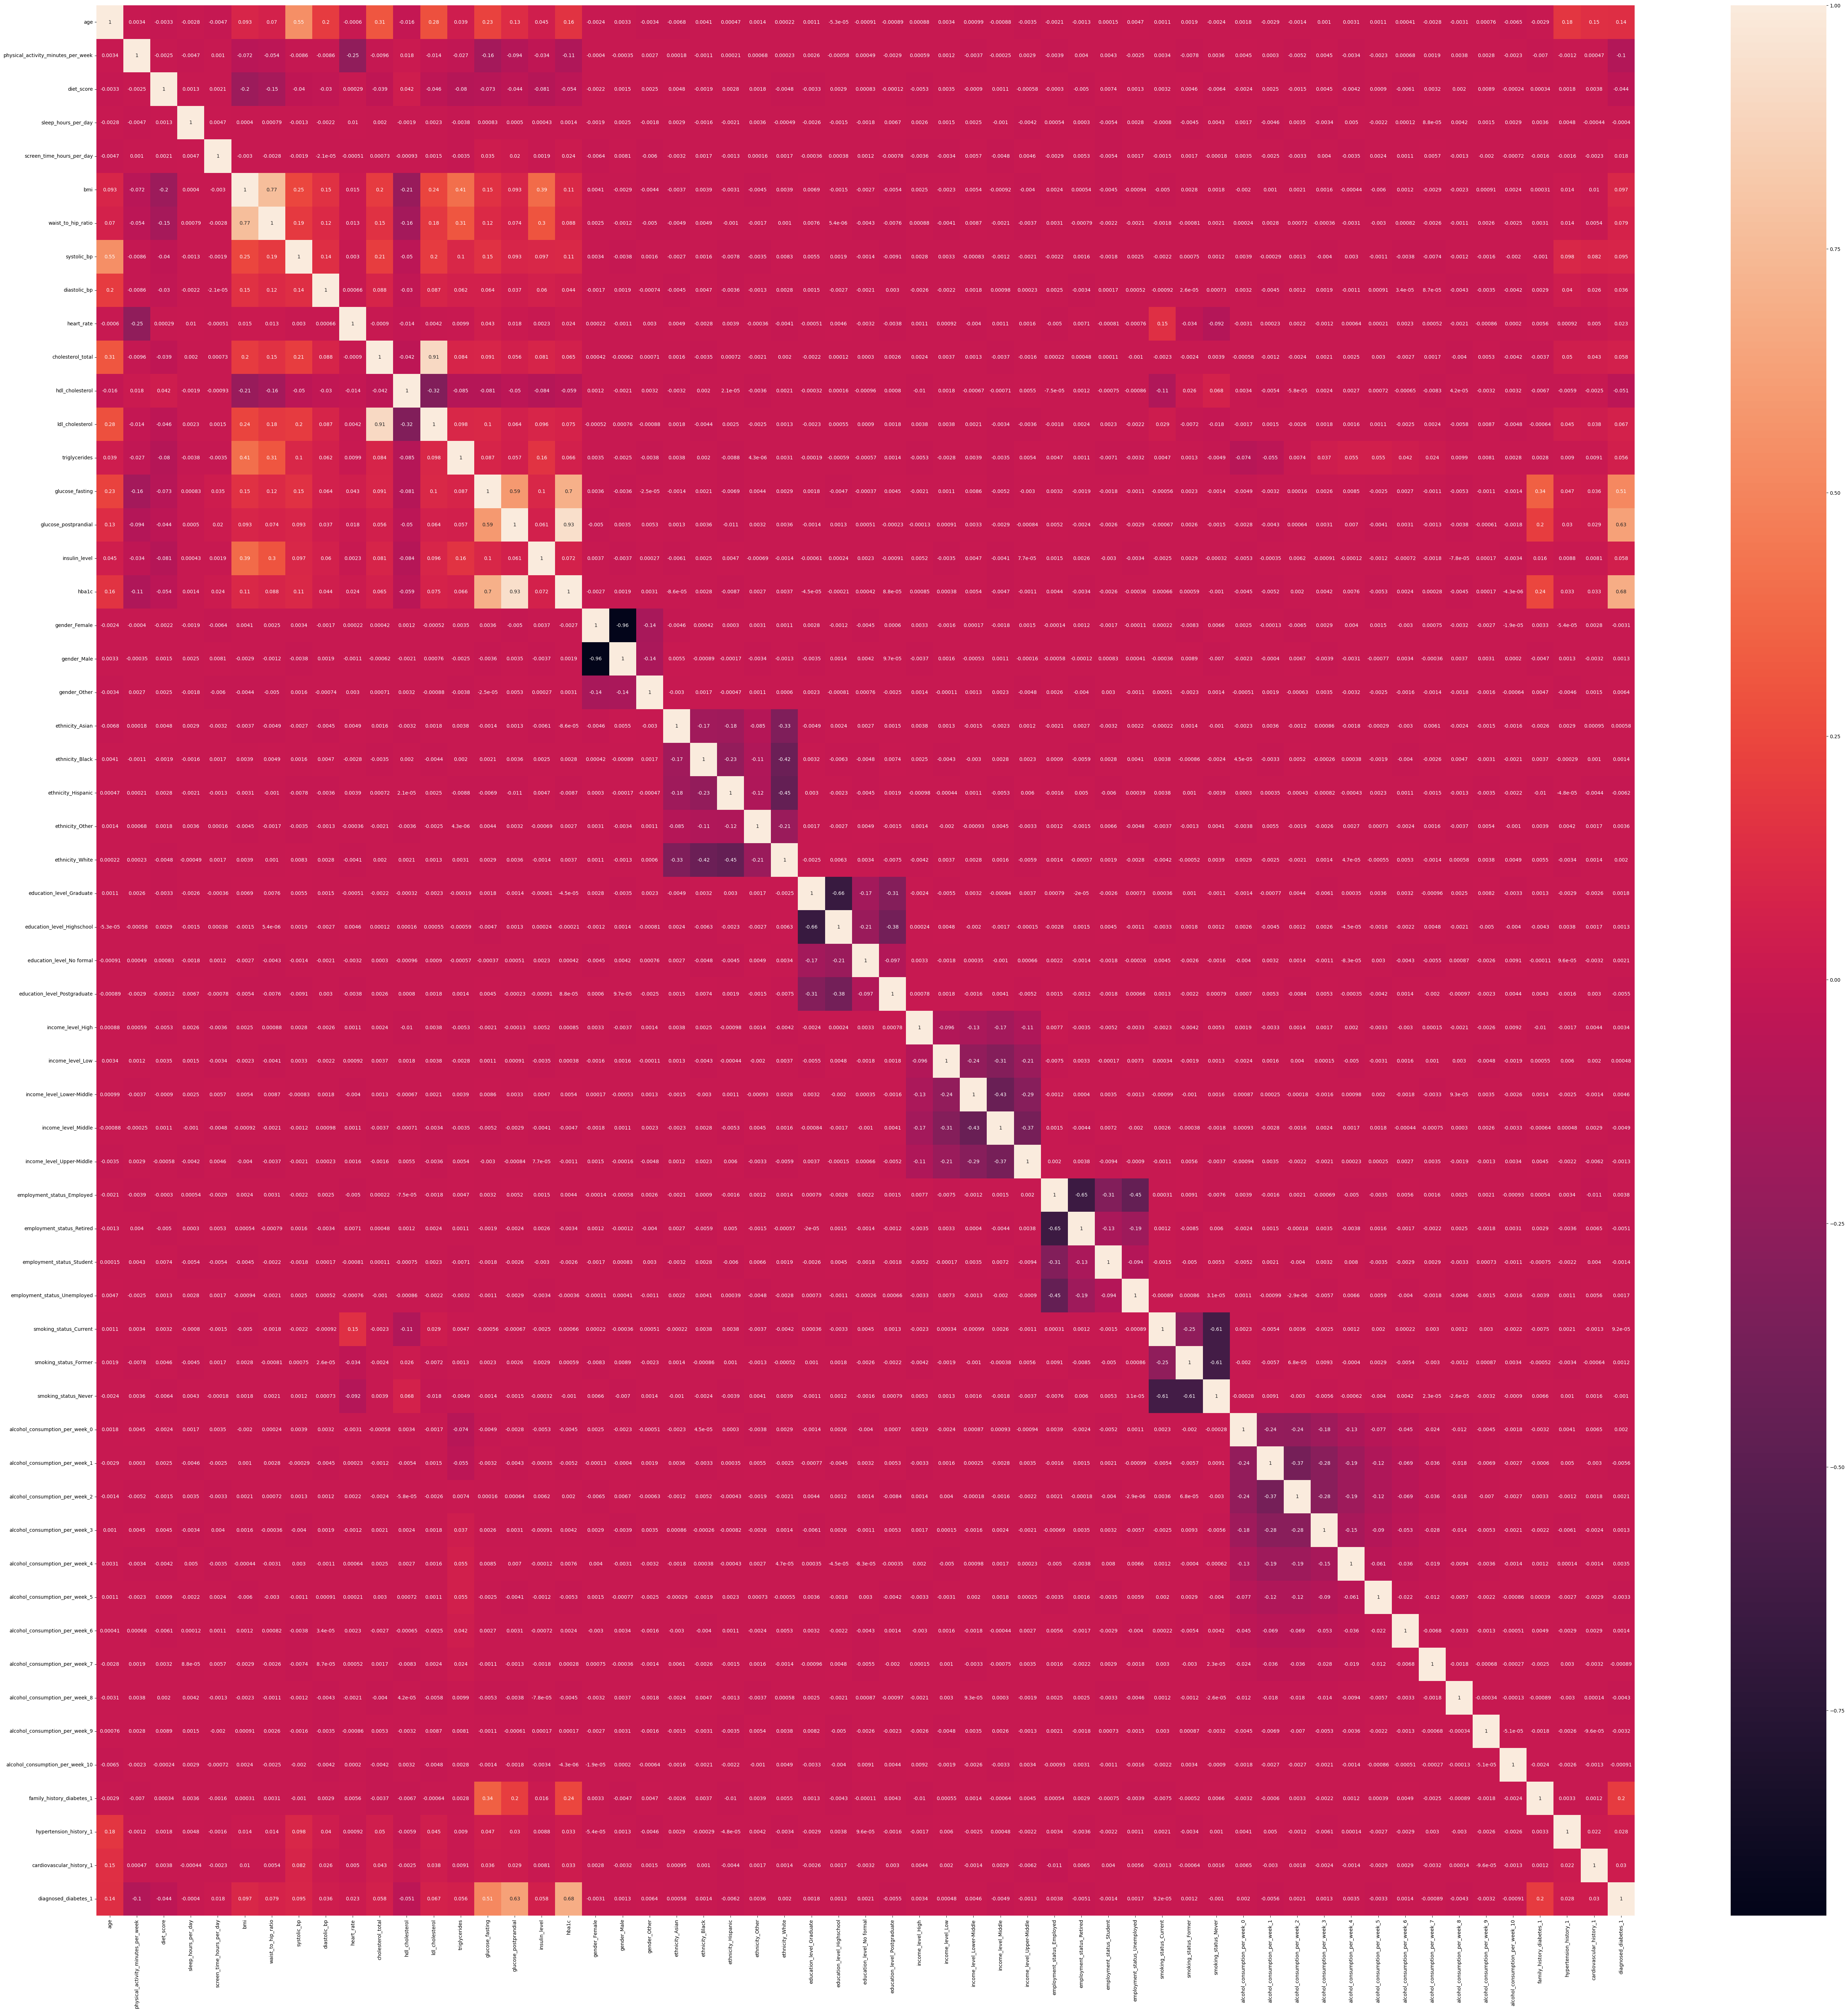

In [211]:
# Mapa de Calor
import seaborn as sns
plt.figure(figsize=(70,70))
sns.heatmap(data_num.corr(),annot=True)

# 7. Análisis de correlaciones para irrelevancias (sólo predicción)

In [212]:
# Calcular las correlaciones de todas las variables numéricas con la variable objetivo
correlaciones = data_num.corr(numeric_only=True)['diagnosed_diabetes_1'].sort_values(ascending=False)

# Mostrar todas las correlaciones
print(correlaciones)

# Filtrar variables irrelevantes (correlación muy baja)
irrelevantes = correlaciones[abs(correlaciones) < 0.05]
print("\n🔹 Variables con correlación baja (< 0.05) con la variable objetivo:\n")
print(irrelevantes)

diagnosed_diabetes_1                  1.000000
hba1c                                 0.679397
glucose_postprandial                  0.629832
glucose_fasting                       0.510919
family_history_diabetes_1             0.197926
age                                   0.137713
bmi                                   0.097057
systolic_bp                           0.095481
waist_to_hip_ratio                    0.078918
ldl_cholesterol                       0.067475
cholesterol_total                     0.058173
insulin_level                         0.057715
triglycerides                         0.056230
diastolic_bp                          0.035619
cardiovascular_history_1              0.029793
hypertension_history_1                0.027524
heart_rate                            0.022785
screen_time_hours_per_day             0.018127
gender_Other                          0.006430
income_level_Lower-Middle             0.004587
employment_status_Employed            0.003845
ethnicity_Oth

Luego del analisis de correlacción irrelevantes con respecto a la variable objetivo, estas serian las variables que se deberian eliminar del dataset:

🟠 Variables categóricas con todas sus categorías irrelevantes

**1. gender**

* Categorías: Male, Female, Other
* Observación: Todas las dummies asociadas mostraron correlaciones despreciables con la variable objetivo (|r| << 0.05).
* Motivo de eliminación: No aportaba señal predictiva discernible y su inclusión habría aumentado dimensionalidad sin beneficio.


**2. income_level**

* Categorías: Low, Lower-Middle, Middle, Upper-Middle, High
* Observación: Todas las categorías presentaron correlaciones muy bajas.
* Motivo de eliminación: Variable socioeconómica con escasa relación estadística con diagnosed_diabetes en este conjunto; se eliminó para simplificar el modelo.


**3. employment_status**

* Categorías: Employed, Unemployed, Student, Retired
* Observación: Dummies con correlaciones próximas a cero.
*Motivo de eliminación: No aportó información útil para la predicción y podía introducir ruido.


**4. ethnicity**

* Categorías: White, Black, Asian, Hispanic, Other
* Observación: Todas las dummies mostraron correlaciones irrelevantes.
*Motivo de eliminación: Se descartó por baja asociación estadística con la variable objetivo en el dataset analizado.


**5. education_level**

* Categorías: No formal, Highschool, Graduate, Postgraduate
* Observación: Correlaciones de categorías cercanas a cero.
* Motivo de eliminación: No mejoraba la capacidad predictiva y aumentaba la complejidad.


**6. alcohol_consumption_per_week**

* Categorías: 0 a 10 (dummies)
* Observación: Ninguna de las categorías mostró correlación relevante con la variable objetivo.
* Motivo de eliminación: La frecuencia de consumo alcohólico, tal y como está representada, no resultó informativa para el modelo en este dataset.


**7. smoking_status**

* Categorías: Former, Current, Never
* Observación: Dummies sin señal predictiva significativa.
* Motivo de eliminación: Se removió por su baja correlación y para reducir dimensionalidad.



🔵 Variables numéricas y binarias eliminadas por baja correlación

**1. sleep_hours_per_day**

* Correlación: ≈ -0.0004
* Observación: Nulo aporte estadístico.
* Motivo de eliminación: No aportó información útil y podía introducir variabilidad innecesaria.


**2. heart_rate**

* Correlación: ≈ 0.0228
* Observación: Correlación positiva pero muy baja (|r| < 0.05).
* Motivo de eliminación: Su efecto fue marginal; se optó por eliminarla para simplificar el conjunto de características.


**3. screen_time_hours_per_day**

* Correlación: ≈ 0.0181
* Observación: Asociación muy débil con la variable objetivo.
* Motivo de eliminación: Se consideró irrelevante para la predicción en este contexto.


**4. diet_score**

* Correlación: ≈ -0.0443
* Observación: Aunque su |r| se acercó al umbral, la correlación fue baja y negativa.
* Motivo de eliminación: Se eliminó por su aporte predictivo marginal y para evitar ruido; sin embargo, requiere monitoreo si futuros modelos indican su utilidad.


**5. diastolic_bp**

* Correlación: ≈ 0.0356
* Observación: Relación positiva pero débil.
* Motivo de eliminación: Se prefirió conservar sólo la representación más informativa de la presión arterial (si aplica), evitando redundancia con otras medidas (por ejemplo, systolic_bp o mean_bp si se crea).


**6. cardiovascular_history**

* Correlación: (dummy cardiovascular_history_1 ≈ 0.0298)
* Observación: Baja correlación con la variable objetivo.
* Motivo de eliminación: No mostró señal suficiente para justificar su inclusión en el modelo final.


**7. hypertension_history**

* Correlación: (dummy hypertension_history_1 ≈ 0.0275)
* Observación: Asociación débil.
* Motivo de eliminación: Se eliminó por su contribución estadística marginal.

In [213]:
# Eliminación de variables redundantes con correlación > 0.8 respecto a la variable objetivo
data = data.drop([
    'glucose_postprandial',
    'cholesterol_total'
    ], axis=1)
# Eliminación de variables irrelevantes con correlación < 0.01 respecto a la variable objetivo
data = data.drop([
    'gender',
    'income_level',
    'employment_status',
    'ethnicity',
    'education_level',
    'alcohol_consumption_per_week',
    'smoking_status',
    'sleep_hours_per_day',
    'heart_rate',
    'screen_time_hours_per_day',
    'diet_score',
    'diastolic_bp',
    'cardiovascular_history',
    'hypertension_history'
], axis=1)  # axis=1 indica que se están eliminando columnas
data.head()

age  physical_activity_minutes_per_week family_history_diabetes   bmi  \
0   58                                 215                       0  30.5   
1   48                                 143                       0  23.1   
2   60                                  57                       1  22.2   
3   74                                  49                       0  26.8   
4   46                                 109                       0  21.2   

   waist_to_hip_ratio  systolic_bp  hdl_cholesterol  ldl_cholesterol  \
0                0.89          134               41              160   
1                0.80          129               55               50   
2                0.81          115               66               99   
3                0.88          120               50               79   
4                0.78           92               52              125   

   triglycerides  glucose_fasting  insulin_level  hba1c diagnosed_diabetes  
0            145              136           6.36   8.18                  1  
1             30               93           2.00   5.63                  0  
2             36              118           5.07   7.51                  1  
3            140              139           5.28   9.03                  1  
4            160              137          12.74   7.20                  1

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 100000 non-null  int64   
 1   physical_activity_minutes_per_week  100000 non-null  int64   
 2   family_history_diabetes             100000 non-null  category
 3   bmi                                 100000 non-null  float64 
 4   waist_to_hip_ratio                  100000 non-null  float64 
 5   systolic_bp                         100000 non-null  int64   
 6   hdl_cholesterol                     100000 non-null  int64   
 7   ldl_cholesterol                     100000 non-null  int64   
 8   triglycerides                       100000 non-null  int64   
 9   glucose_fasting                     100000 non-null  int64   
 10  insulin_level                       100000 non-null  float64 
 11  hba1c         

# 8. Balanceo
En esta etapa se analiza la distribución de la variable objetivo diagnosed_diabetes con el propósito de determinar si es necesario aplicar técnicas de balanceo de clases. Este análisis permite identificar posibles sesgos en el modelo predictivo debido a una representación desigual de las categorías.

/tmp/ipython-input-2477954634.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['diagnosed_diabetes']).plot(kind="bar")


<Axes: xlabel='diagnosed_diabetes'>

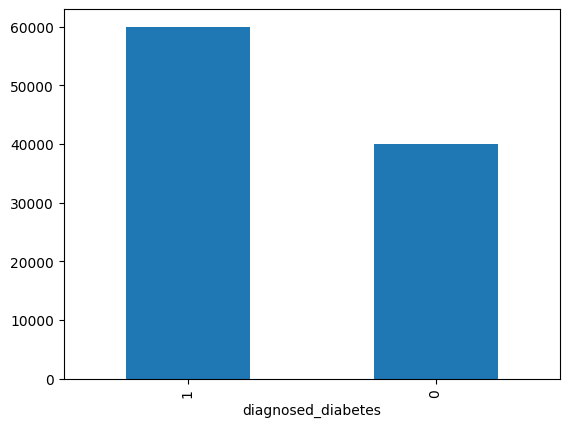

In [215]:
# Vairable Objetivo
pd.value_counts(data['diagnosed_diabetes']).plot(kind="bar")

In [216]:
# Conteo de Clases
data['diagnosed_diabetes'].value_counts()

diagnosed_diabetes
1    59998
0    40002
Name: count, dtype: int64

In [217]:
# Porcentaje de cada Clase
data['diagnosed_diabetes'].value_counts(normalize=True)*100

diagnosed_diabetes
1    59.998
0    40.002
Name: proportion, dtype: float64

Dado que ambas categorías presentan una distribución relativamente equilibrada, no es necesario aplicar técnicas de balanceo, ya que el conjunto de datos no evidencia un desbalance significativo que afecte el entrenamiento del modelo

## 9. Ingenieria de Caracteristicas
Transformación

**`9.1 Normalización`**: De deben crear Dummies a las variables categoricas y normalizar las variables numericas

In [218]:
data_Nor=data.copy()

In [219]:
data_Nor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 100000 non-null  int64   
 1   physical_activity_minutes_per_week  100000 non-null  int64   
 2   family_history_diabetes             100000 non-null  category
 3   bmi                                 100000 non-null  float64 
 4   waist_to_hip_ratio                  100000 non-null  float64 
 5   systolic_bp                         100000 non-null  int64   
 6   hdl_cholesterol                     100000 non-null  int64   
 7   ldl_cholesterol                     100000 non-null  int64   
 8   triglycerides                       100000 non-null  int64   
 9   glucose_fasting                     100000 non-null  int64   
 10  insulin_level                       100000 non-null  float64 
 11  hba1c         

In [220]:
#Normalización: Sólo para variables numéricas (no dummies)
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
data_Nor[['age', 'physical_activity_minutes_per_week','bmi',
          'waist_to_hip_ratio', 'systolic_bp', 'hdl_cholesterol',
           'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
           'insulin_level', 'hba1c']] = min_max_scaler.fit_transform(data_Nor[['age', 'physical_activity_minutes_per_week','bmi',
          'waist_to_hip_ratio', 'systolic_bp', 'hdl_cholesterol',
           'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
           'insulin_level', 'hba1c']])
data_Nor.head()

age  physical_activity_minutes_per_week family_history_diabetes  \
0  0.555556                            0.258103                       0   
1  0.416667                            0.171669                       0   
2  0.583333                            0.068427                       1   
3  0.777778                            0.058824                       0   
4  0.388889                            0.130852                       0   

        bmi  waist_to_hip_ratio  systolic_bp  hdl_cholesterol  \
0  0.640496            0.564103     0.494382         0.269231   
1  0.334711            0.333333     0.438202         0.448718   
2  0.297521            0.358974     0.280899         0.589744   
3  0.487603            0.538462     0.337079         0.384615   
4  0.256198            0.282051     0.022472         0.410256   

   ldl_cholesterol  triglycerides  glucose_fasting  insulin_level     hba1c  \
0         0.516432       0.366242         0.678571       0.144275  0.720690   
1         0.000000       0.000000         0.294643       0.000000  0.281034   
2         0.230047       0.019108         0.517857       0.101588  0.605172   
3         0.136150       0.350318         0.705357       0.108537  0.867241   
4         0.352113       0.414013         0.687500       0.355394  0.551724   

  diagnosed_diabetes  
0                  1  
1                  0  
2                  1  
3                  1  
4                  1

In [221]:
data_Nor.describe()

age  physical_activity_minutes_per_week            bmi  \
count  100000.000000                       100000.000000  100000.000000   
mean        0.446117                            0.142751       0.438539   
std         0.216731                            0.101332       0.148211   
min         0.000000                            0.000000       0.000000   
25%         0.291667                            0.068427       0.338843   
50%         0.444444                            0.120048       0.438017   
75%         0.597222                            0.192077       0.537190   
max         1.000000                            1.000000       1.000000   

       waist_to_hip_ratio    systolic_bp  hdl_cholesterol  ldl_cholesterol  \
count       100000.000000  100000.000000    100000.000000    100000.000000   
mean             0.477123       0.289883         0.436446         0.248828   
std              0.120096       0.160495         0.131633         0.156762   
min              0.000000       0.000000         0.000000         0.000000   
25%              0.384615       0.179775         0.346154         0.131455   
50%              0.487179       0.292135         0.435897         0.244131   
75%              0.564103       0.393258         0.525641         0.356808   
max              1.000000       1.000000         1.000000         1.000000   

       triglycerides  glucose_fasting  insulin_level          hba1c  
count  100000.000000    100000.000000  100000.000000  100000.000000  
mean        0.291282         0.456403       0.233661       0.434617  
std         0.138129         0.121389       0.163933       0.140331  
min         0.000000         0.000000       0.000000       0.000000  
25%         0.194268         0.375000       0.102250       0.339655  
50%         0.289809         0.455357       0.224686       0.434483  
75%         0.385350         0.535714       0.345797       0.529310  
max         1.000000         1.000000       1.000000       1.000000

In [222]:
#Variables categóricas con 2 categorías -> Borramos una dummy (NO VA LA VARIABLE OBJETIVO)
data_Nor = pd.get_dummies(data_Nor, columns=['family_history_diabetes'], drop_first=True, dtype=int)

#Variables categóricas con más de 2 categorías -> No borramos
#data = pd.get_dummies(data, columns=['Cat'], drop_first=False)
data_Nor.head()

age  physical_activity_minutes_per_week       bmi  waist_to_hip_ratio  \
0  0.555556                            0.258103  0.640496            0.564103   
1  0.416667                            0.171669  0.334711            0.333333   
2  0.583333                            0.068427  0.297521            0.358974   
3  0.777778                            0.058824  0.487603            0.538462   
4  0.388889                            0.130852  0.256198            0.282051   

   systolic_bp  hdl_cholesterol  ldl_cholesterol  triglycerides  \
0     0.494382         0.269231         0.516432       0.366242   
1     0.438202         0.448718         0.000000       0.000000   
2     0.280899         0.589744         0.230047       0.019108   
3     0.337079         0.384615         0.136150       0.350318   
4     0.022472         0.410256         0.352113       0.414013   

   glucose_fasting  insulin_level     hba1c diagnosed_diabetes  \
0         0.678571       0.144275  0.720690                  1   
1         0.294643       0.000000  0.281034                  0   
2         0.517857       0.101588  0.605172                  1   
3         0.705357       0.108537  0.867241                  1   
4         0.687500       0.355394  0.551724                  1   

   family_history_diabetes_1  
0                          0  
1                          0  
2                          1  
3                          0  
4                          0

In [223]:
# Encoder: Transformación de categorías a números (sólo para la variable objetivo)
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data_Nor["diagnosed_diabetes"] = labelencoder.fit_transform(data_Nor["diagnosed_diabetes"])
data_Nor.head()

age  physical_activity_minutes_per_week       bmi  waist_to_hip_ratio  \
0  0.555556                            0.258103  0.640496            0.564103   
1  0.416667                            0.171669  0.334711            0.333333   
2  0.583333                            0.068427  0.297521            0.358974   
3  0.777778                            0.058824  0.487603            0.538462   
4  0.388889                            0.130852  0.256198            0.282051   

   systolic_bp  hdl_cholesterol  ldl_cholesterol  triglycerides  \
0     0.494382         0.269231         0.516432       0.366242   
1     0.438202         0.448718         0.000000       0.000000   
2     0.280899         0.589744         0.230047       0.019108   
3     0.337079         0.384615         0.136150       0.350318   
4     0.022472         0.410256         0.352113       0.414013   

   glucose_fasting  insulin_level     hba1c  diagnosed_diabetes  \
0         0.678571       0.144275  0.720690                   1   
1         0.294643       0.000000  0.281034                   0   
2         0.517857       0.101588  0.605172                   1   
3         0.705357       0.108537  0.867241                   1   
4         0.687500       0.355394  0.551724                   1   

   family_history_diabetes_1  
0                          0  
1                          0  
2                          1  
3                          0  
4                          0

**`9.2 Discretización`**: Transformación de número a categoría

In [224]:
data_cat = data.copy()
data_cat.describe()

age  physical_activity_minutes_per_week            bmi  \
count  100000.00000                       100000.000000  100000.000000   
mean       50.12041                          118.911640      25.612653   
std        15.60460                           84.409662       3.586705   
min        18.00000                            0.000000      15.000000   
25%        39.00000                           57.000000      23.200000   
50%        50.00000                          100.000000      25.600000   
75%        61.00000                          160.000000      28.000000   
max        90.00000                          833.000000      39.200000   

       waist_to_hip_ratio    systolic_bp  hdl_cholesterol  ldl_cholesterol  \
count       100000.000000  100000.000000    100000.000000    100000.000000   
mean             0.856078     115.799610        54.042790       103.000430   
std              0.046837      14.284073        10.267374        33.390256   
min              0.670000      90.000000        20.000000        50.000000   
25%              0.820000     106.000000        47.000000        78.000000   
50%              0.860000     116.000000        54.000000       102.000000   
75%              0.890000     125.000000        61.000000       126.000000   
max              1.060000     179.000000        98.000000       263.000000   

       triglycerides  glucose_fasting  insulin_level          hba1c  
count  100000.000000     100000.00000  100000.000000  100000.000000  
mean      121.462650        111.11712       9.061242       6.520776  
std        43.372619         13.59561       4.954060       0.813921  
min        30.000000         60.00000       2.000000       4.000000  
25%        91.000000        102.00000       5.090000       5.970000  
50%       121.000000        111.00000       8.790000       6.520000  
75%       151.000000        120.00000      12.450000       7.070000  
max       344.000000        172.00000      32.220000       9.800000

In [225]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 100000 non-null  int64   
 1   physical_activity_minutes_per_week  100000 non-null  int64   
 2   family_history_diabetes             100000 non-null  category
 3   bmi                                 100000 non-null  float64 
 4   waist_to_hip_ratio                  100000 non-null  float64 
 5   systolic_bp                         100000 non-null  int64   
 6   hdl_cholesterol                     100000 non-null  int64   
 7   ldl_cholesterol                     100000 non-null  int64   
 8   triglycerides                       100000 non-null  int64   
 9   glucose_fasting                     100000 non-null  int64   
 10  insulin_level                       100000 non-null  float64 
 11  hba1c         

<Axes: xlabel='age'>

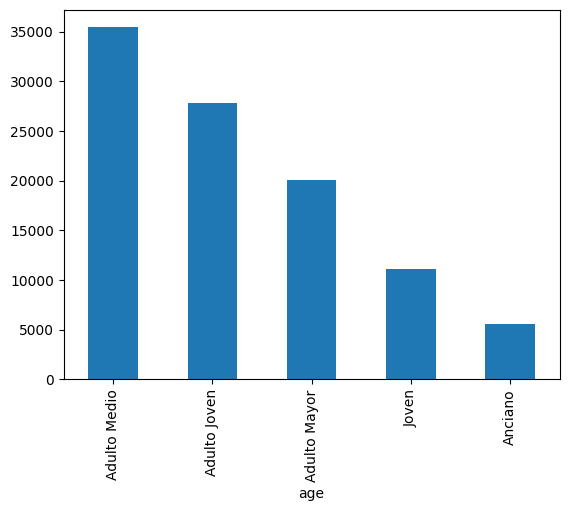

In [226]:
# Age
bins = [17, 30, 45, 60, 75, 90]
labels = ['Joven', 'Adulto Joven', 'Adulto Medio', 'Adulto Mayor', 'Anciano']
data_cat['age'] = pd.cut(data_cat['age'], bins=bins, labels=labels)
data_cat['age'].value_counts().plot(kind='bar')

<Axes: xlabel='physical_activity_minutes_per_week'>

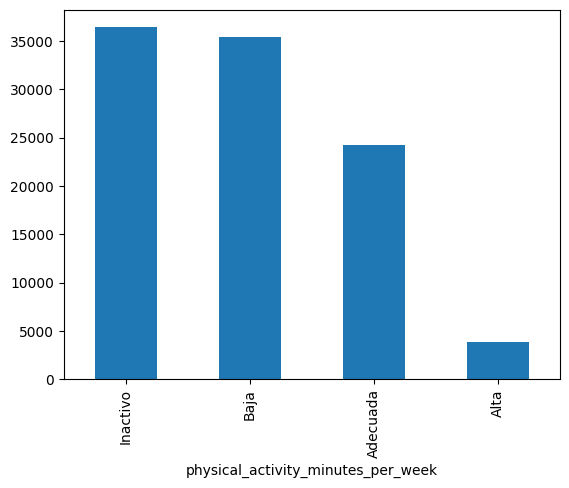

In [227]:
#physical_activity_minutes_per_week
bins = [-1, 75, 150, 300, 833]
labels = ['Inactivo', 'Baja', 'Adecuada', 'Alta']
data_cat['physical_activity_minutes_per_week'] = pd.cut(data_cat['physical_activity_minutes_per_week'], bins=bins, labels=labels)
data_cat['physical_activity_minutes_per_week'].value_counts().plot(kind='bar')

<Axes: xlabel='bmi'>

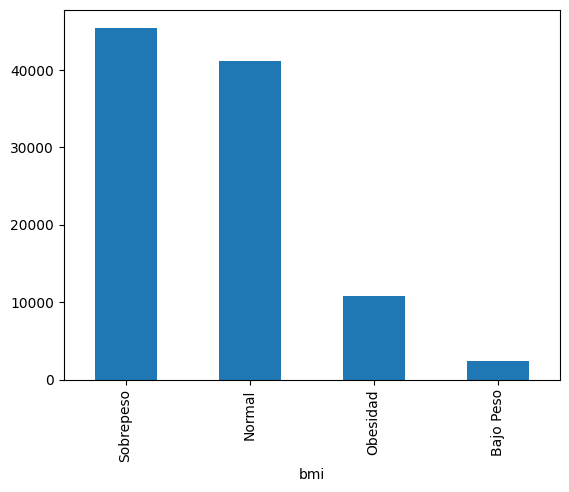

In [228]:
# bmi
bins = [0, 18.5, 25, 30, 40]
labels = ['Bajo Peso', 'Normal', 'Sobrepeso', 'Obesidad']
data_cat['bmi'] = pd.cut(data_cat['bmi'], bins=bins, labels=labels)
data_cat['bmi'].value_counts().plot(kind='bar')

<Axes: xlabel='waist_to_hip_ratio'>

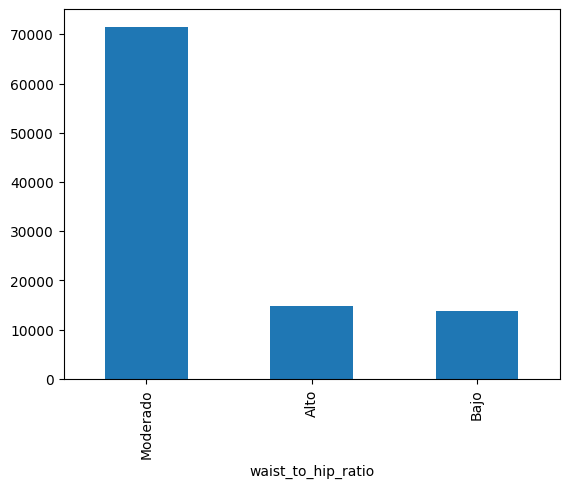

In [229]:
# waist_to_hip_ratio
bins = [0.65, 0.80, 0.90, 1.06]
labels = ['Bajo', 'Moderado', 'Alto']
data_cat['waist_to_hip_ratio'] = pd.cut(data_cat['waist_to_hip_ratio'], bins=bins, labels=labels)
data_cat['waist_to_hip_ratio'].value_counts().plot(kind='bar')

<Axes: xlabel='systolic_bp'>

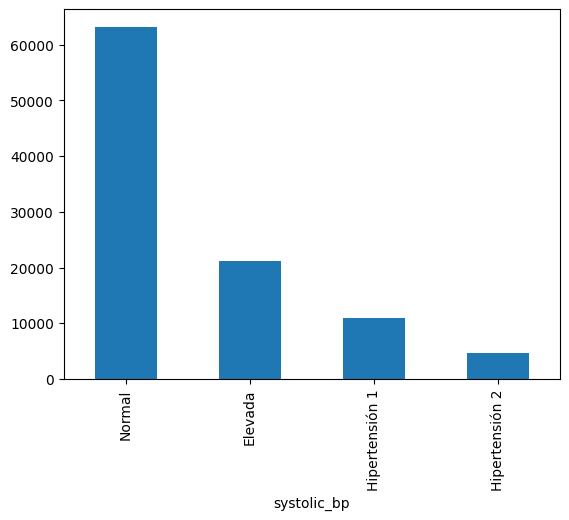

In [230]:
# systolic_bp
bins = [89, 120, 130, 140, 179]
labels = ['Normal', 'Elevada', 'Hipertensión 1', 'Hipertensión 2']
data_cat['systolic_bp'] = pd.cut(data_cat['systolic_bp'], bins=bins, labels=labels)
data_cat['systolic_bp'].value_counts().plot(kind='bar')

<Axes: xlabel='hdl_cholesterol'>

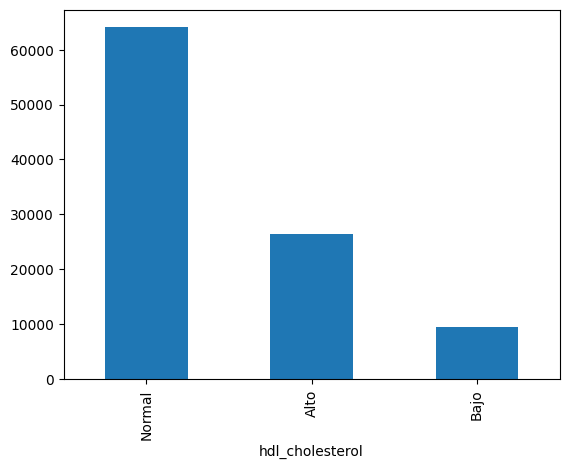

In [231]:
# hdl_cholesterol
bins = [19, 40, 60, 98]
labels = ['Bajo', 'Normal', 'Alto']
data_cat['hdl_cholesterol'] = pd.cut(data_cat['hdl_cholesterol'], bins=bins, labels=labels)
data_cat['hdl_cholesterol'].value_counts().plot(kind='bar')

<Axes: xlabel='ldl_cholesterol'>

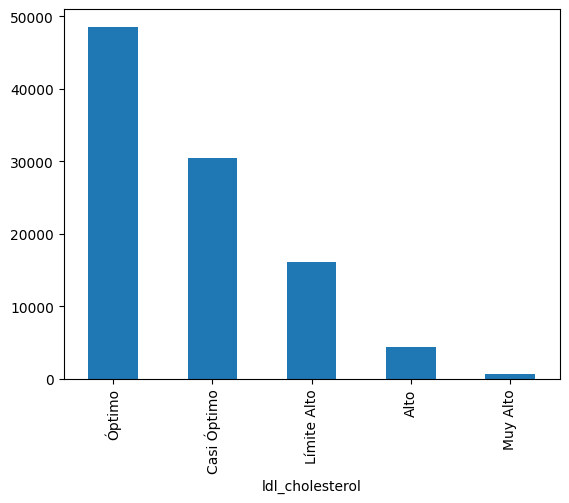

In [232]:
# ldl_cholesterol
bins = [49, 100, 130, 160, 190, 263]
labels = ['Óptimo', 'Casi Óptimo', 'Límite Alto', 'Alto', 'Muy Alto']
data_cat['ldl_cholesterol'] = pd.cut(data_cat['ldl_cholesterol'], bins=bins, labels=labels)
data_cat['ldl_cholesterol'].value_counts().plot(kind='bar')

<Axes: xlabel='triglycerides'>

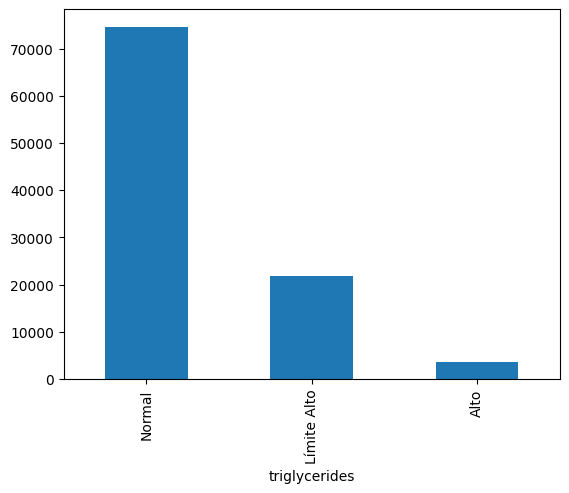

In [233]:
# triglycerides
bins = [29, 150, 200, 344]
labels = ['Normal', 'Límite Alto', 'Alto']
data_cat['triglycerides'] = pd.cut(data_cat['triglycerides'], bins=bins, labels=labels)
data_cat['triglycerides'].value_counts().plot(kind='bar')

<Axes: xlabel='glucose_fasting'>

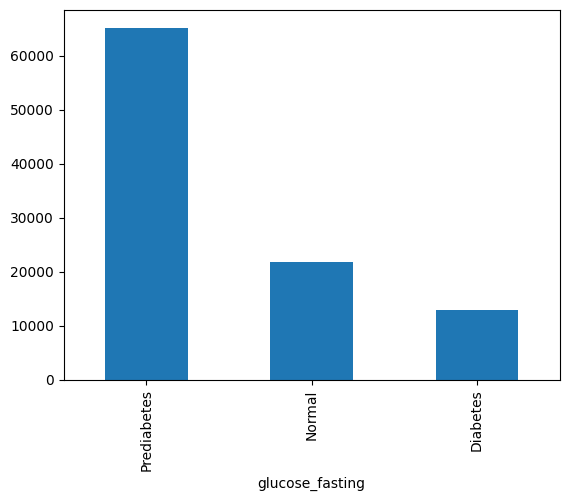

In [234]:
# glucose_fasting
bins = [59, 100, 126, 172]
labels = ['Normal', 'Prediabetes', 'Diabetes']
data_cat['glucose_fasting'] = pd.cut(data_cat['glucose_fasting'], bins=bins, labels=labels)
data_cat['glucose_fasting'].value_counts().plot(kind='bar')

<Axes: xlabel='insulin_level'>

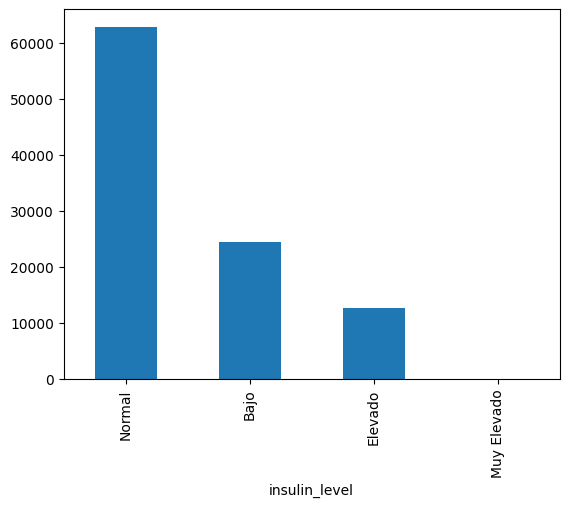

In [235]:
# insulin_level
bins = [1.9, 5, 15, 30, 32.2]
labels = ['Bajo', 'Normal', 'Elevado', 'Muy Elevado']
data_cat['insulin_level'] = pd.cut(data_cat['insulin_level'], bins=bins, labels=labels)
data_cat['insulin_level'].value_counts().plot(kind='bar')

<Axes: xlabel='hba1c'>

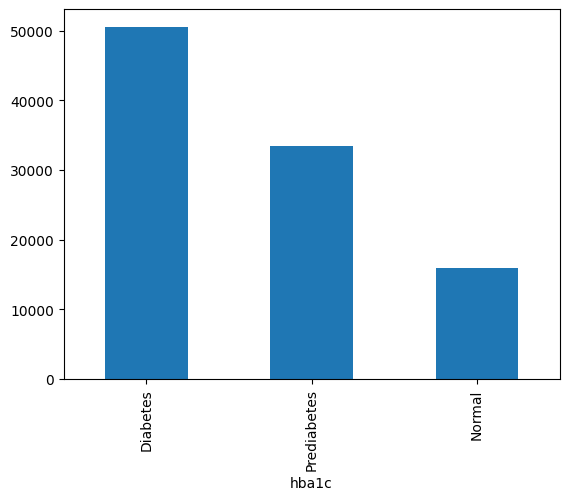

In [236]:
# hba1c
bins = [3.9, 5.7, 6.5, 9.8]
labels = ['Normal', 'Prediabetes', 'Diabetes']
data_cat['hba1c'] = pd.cut(data_cat['hba1c'], bins=bins, labels=labels)
data_cat['hba1c'].value_counts().plot(kind='bar')

In [237]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 100000 non-null  category
 1   physical_activity_minutes_per_week  100000 non-null  category
 2   family_history_diabetes             100000 non-null  category
 3   bmi                                 100000 non-null  category
 4   waist_to_hip_ratio                  100000 non-null  category
 5   systolic_bp                         100000 non-null  category
 6   hdl_cholesterol                     100000 non-null  category
 7   ldl_cholesterol                     100000 non-null  category
 8   triglycerides                       100000 non-null  category
 9   glucose_fasting                     100000 non-null  category
 10  insulin_level                       99999 non-null   category
 11  hba1c         

# **Guardar Datos Transformados**

In [238]:
data_cat.to_excel('./datos_categoricos_diabetes_dataset.xlsx')

In [239]:
data_Nor.to_excel('./datos_numericos_diabetes_dataset.xlsx')